<h1> Linear Regression From Scratch </h1>

The simplest model that we can fit to data is a line. When we are trying to find a line that fits a set of data best, we are performing Linear Regression. 

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

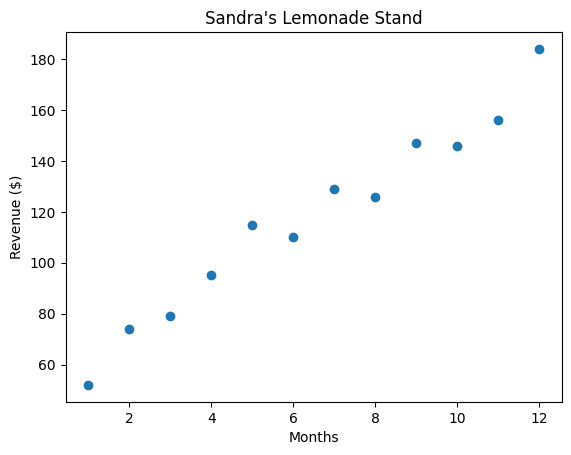

In [39]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()

# Eyball estimation revenue in month 13
month_13 = 200

Loss: 

For each data point, we calculate loss, a number that measures how bad the model’s (in this case, the line’s) prediction was. Loss is the squared distance from the point to the line. The goal of a linear regression model is to find the slope and intercept pair that minimises loss on average across all of the data.


In [40]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0

#y = 0.5x + 1
m2 = 0.5
b2 = 1

y_predicted1 = [m1*x_value +b1 for x_value in x]
y_predicted2 = [m2*x_value +b2 for x_value in x]

total_loss1 = 0

# Calculating the loss for y_predicted1

for i in range(len(y)):
  squared_distance = (y[i] - y_predicted1[i]) ** 2
  total_loss1 += squared_distance

print(total_loss1)

total_loss2 = 0

for i in range(len(y)):
  squared_distance = (y[i] - y_predicted2[i]) ** 2
  total_loss2 += squared_distance

# Line 2 is the better fitting line
print(total_loss2)
better_fit = 2

17
13.5


<h2>Gradient Descent for Intercept</h2>
As we try to minimise loss, we take each parameter, and move it as long as we are decreasing loss. Find the sum of y_value - (m*x_value + b) for all the y_values and x_values and then multiply the sum by a factor of -2/N. N is the number of points. N is the number of points we have in our dataset m is the current gradient guess b is the current intercept guess

In [41]:
# Gradient descent for intercept

def get_gradient_at_b(x, y, m, b):
  diff = 0
  for i in range(len(y)):
    diff_value = y[i] - (m*x[i]+b)
    diff += diff_value
  
  b_gradient = -2/len(x) * diff
  
  return b_gradient

<h2>Gradient Descent for Slope</h2>

To find the m gradient, or the way the loss changes as the slope of our line changes, we can use this formula:

N is the number of points you have in your dataset
m is the current gradient guess
b is the current intercept guess

To find the m gradient:

Find the sum of x_value * (y_value - (m*x_value + b)) for all the y_values and x_values and then we multiply the sum by a factor of -2/N. N is the number of points. Once calculatec both the m gradient and the b gradient, follow both of those gradients downwards to the point of lowest loss for both the m value and the b value. They're best m and the best b to fit the data.

In [42]:
def get_gradient_at_b(x, y, m, b):
    diff = 0
    N = len(x)
    for i in range(N):
      y_val = y[i]
      x_val = x[i]
      diff += (y_val - ((m * x_val) + b))
    b_gradient = -2/N * diff
    return b_gradient

'''
To find the m gradient:
find the sum of x_value * (y_value - (m*x_value + b)) for all the y_values and x_values, then  multiply the sum by a factor of -2/N. N'''
def get_gradient_at_m(x ,y ,m, b):
  diff = 0
  for i in range(len(y)):
    diff += x[i] * (y[i] - (m*x[i] + b))
    m_gradient = -2/len(x) * diff
  return m_gradient

Scale the size of the step by multiplying the gradient by a learning rate.

To find a new b value:

new_b = current_b - (learning_rate * b_gradient)

Where current_b is our inital estimate for what the b value is, b_gradient is the gradient of the loss curve at our initial estimate, and learning_rate is proportional to the size of the step.

In [43]:
def step_gradient(x, y, b_current, m_current): 
  '''This function will find the gradients at b_current and m_current, and then return new b and m values that have been moved in that direction'''
  b_gradient = get_gradient_at_b(x, y, b_current, m_current)
  m_gradient = get_gradient_at_m(x, y, b_current, m_current)
  b = b_current - (0.01 * b_gradient)
  m = m_current - (0.01 * m_gradient)
  return [b, m]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0

# Call function to update b and m
b, m = step_gradient(months, revenue, b, m)
print(b, m)

2.355 17.78333333333333


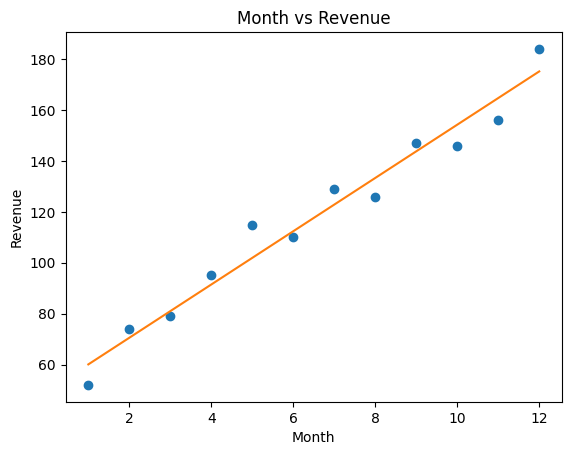

In [44]:
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

#Your step_gradient function here
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
#Your gradient_descent function here:  

def gradient_descent(x, y, learning_rate, num_iterations):
  # inital b and m
  b = 0
  m = 0 
  for iteration in range(num_iterations):
    b, m = step_gradient(b, m, x, y, learning_rate)
  return [b, m]


months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Month vs Revenue")
plt.plot(months, y)
plt.show()


Applying on real data:

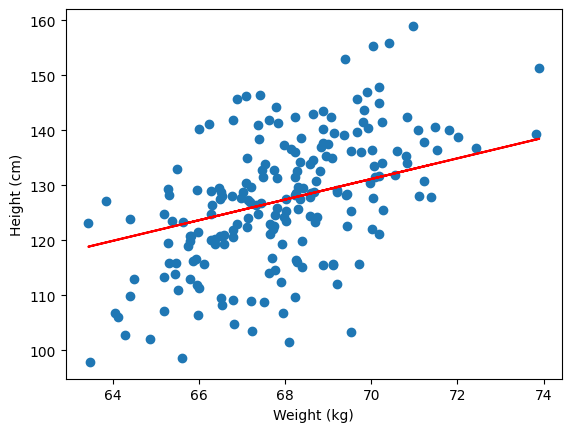

In [45]:
df = pd.read_csv("/Users/jai/Documents/GitHub/MachineLearningPortfolio/LinearRegression/heights.csv")

X = df["height"]
y = df["weight"]

plt.plot(X, y, 'o')
#plot your line here:
b, m  = gradient_descent(X, y, num_iterations=1000, learning_rate=0.0001)

y_predictions = [m*x + b for x in X]
plt.plot(X, y_predictions, color='red')
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.show()

Using LinearRegression from sklearn

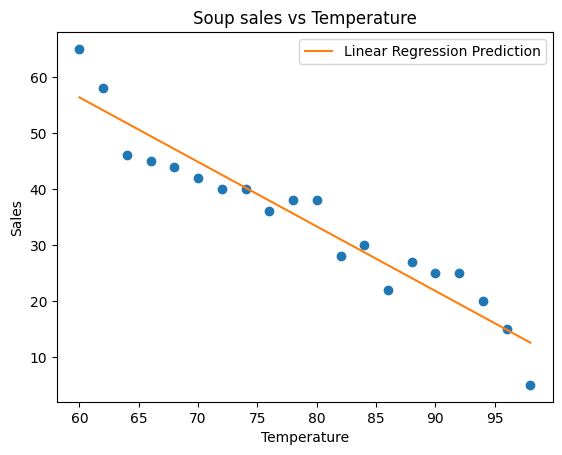

In [46]:
from sklearn.linear_model import LinearRegression

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.title("Soup sales vs Temperature")
# Implementing linear regression
line_fitter = LinearRegression()
line_fitter.fit(X=temperature, y=sales)
# Predicited sales values from the model
sales_predict = line_fitter.predict(temperature)
# Plotting predicted line
plt.plot(temperature, sales_predict, label="Linear Regression Prediction")
plt.legend()
plt.show()